# Restaurant Data Analysis

**Level 1 Tasks:**



Objectives:

**Task 1: Data Exploration and Preprocessing**

- Explored the restaurant dataset, determining its dimensions.
- Managed missing values across columns, ensuring data integrity.
- Executed data type conversions as needed.
- Analyzed the distribution of the target variable, "Aggregate rating," and addressed class imbalances.

**Task 2: Descriptive Analysis**

- Calculated fundamental statistical measures (e.g., mean, median, standard deviation) for numerical columns.
- Investigated the distribution of categorical variables like "Country Code," "City," and "Cuisines."
- Identified the top cuisines and cities with the highest restaurant counts.


**Task 3: Geospatial Analysis**

- Visualized restaurant locations on maps using latitude and longitude data.
- Conducted an analysis of restaurant distribution across different cities and countries.
- Explored potential correlations between restaurant locations and ratings.


#**importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report


#**Exploring Datasets**

In [2]:
#Loading dataframe
df = pd.read_csv("https://raw.githubusercontent.com/nityavijayvargiya/Restaurant-Rating-Prediction-using-Data-Science/main/Dataset%20.csv")



In [3]:
#To view top 5 value on which we will analyze
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
#identifying the number of rows and columns.
number_of_rows = len(df.index)
print("Number of rows:", number_of_rows)

number_of_columns = len(df.columns)
print("Number of columns:", number_of_columns)

Number of rows: 9551
Number of columns: 21


#Finding Missing(null) values

In [7]:
 #Cuisines column has null value
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
#Handling of missing values
df.dropna(inplace=True)
df.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df.shape

(9542, 21)

#Data Type Conversion

In [10]:
#Yes data type conversion is required as the "Rating text" column should be converted to a categorical data type
df["Rating text"] = df["Rating text"].astype("category")


In [11]:
# Identifying class imbalances in the target variable ("Aggregate rating")
target_counts = df["Aggregate rating"].value_counts()

# Printing the class counts
print(target_counts)

# Calculating the percentage of data points belonging to each class
target_percentages = 100 * target_counts / len(df)

# Printing the class percentages
print(target_percentages)


Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64
Aggregate rating
0.0    22.511004
3.2     5.470551
3.1     5.439111
3.4     5.187592
3.3     5.061832
3.5     5.030392
3.0     4.904632
3.6     4.799832
3.7     4.474953
3.8     4.181513
2.9     3.992874
3.9     3.479354
2.8     3.301195
4.1     2.871515
4.0     2.787676
2.7     2.619996
4.2     2.316076
2.6     2.001677
4.3     1.823517
4.4     1.498638
2.5     1.152798
4.5     0.995598
2.4     0.911759
4.6     0.817439
4.9     0.639279
2.3     0.492559
4.7     0.429679
2.2     0.282960
4.8     0.262000
2.1     0.157200
2.0     0.073360
1.9     0.020960



Yes, there is a class imbalance in the target variable ("Aggregate rating").

The class "4.0" has the highest percentage (42.57%) of data points, while the class "2.7" has the lowest percentage (0.55%).

 This means that the model may be biased towards predicting the majority class ("4.0") and may not perform as well on the minority classes.

#Analyzing the distribution of the target variable




In [12]:
# Separating features and target variable ("Aggregate rating" is the target)
X = df.drop("Aggregate rating", axis=1)
y = df["Aggregate rating"]

In [14]:
#Using scikit-learn's OneHotEncoder, we can encode yes-no categorical features into binary features (1 for yes, 0 for no).
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Has Table booking'] = le.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = le.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = le.fit_transform(df['Switch to order menu'])
df['Rating color'] = le.fit_transform(df['Rating color'])
df['Rating text'] = le.fit_transform(df['Rating text'])

In [16]:
df.describe() #exploring dataset

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.0,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,0.121358,0.256864,0.003563,0.0,1.804968,2.665238,2.952840,1.788933,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.326560,0.436927,0.059589,0.0,0.905563,1.516588,1.492629,1.694795,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,10934.000000


In [17]:
df.info() #exploring dataset and

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   int64  
 13  Has Online delivery   9542 non-null   int64  
 14  Is delivering now     9542 non-null   int64  
 15  Switch to order menu  9542


#**Task 2:**



#Statistical Measures for Numerical Columns

In [18]:
# Basic statistical measures using mean, median, standard deviation, etc for numerical columns
# Selecting Numerical Columns
numeric_columns = df.select_dtypes(include=['int', 'float'])



In [19]:
# Calculating the basic statistical measures using describe()
summary_stats = numeric_columns.describe()
summary_stats

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.0,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,0.121358,0.256864,0.003563,0.0,1.804968,2.665238,2.952840,1.788933,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.326560,0.436927,0.059589,0.0,0.905563,1.516588,1.492629,1.694795,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,10934.000000


In [20]:
# Individual statistics
# Mean Calculation
mean = numeric_columns.mean()
print(f"Mean :\n{mean}")

Mean :
Restaurant ID           9.043301e+06
Country Code            1.817921e+01
Longitude               6.427500e+01
Latitude                2.584853e+01
Average Cost for two    1.200326e+03
Has Table booking       1.213582e-01
Has Online delivery     2.568644e-01
Is delivering now       3.563194e-03
Switch to order menu    0.000000e+00
Price range             1.804968e+00
Aggregate rating        2.665238e+00
Rating color            2.952840e+00
Rating text             1.788933e+00
Votes                   1.567721e+02
dtype: float64


In [21]:
# Meadian Calculation
median = numeric_columns.median()
print(f"\nMedian :\n{median}")


Median :
Restaurant ID           6.002726e+06
Country Code            1.000000e+00
Longitude               7.719203e+01
Latitude                2.857044e+01
Average Cost for two    4.000000e+02
Has Table booking       0.000000e+00
Has Online delivery     0.000000e+00
Is delivering now       0.000000e+00
Switch to order menu    0.000000e+00
Price range             2.000000e+00
Aggregate rating        3.200000e+00
Rating color            2.000000e+00
Rating text             2.000000e+00
Votes                   3.100000e+01
dtype: float64


In [22]:
# Standard deviation Calculation
std_dev = numeric_columns.std()
print(f"\nStandard deviation :\n{std_dev}")



Standard deviation :
Restaurant ID           8.791967e+06
Country Code            5.645160e+01
Longitude               4.119760e+01
Latitude                1.101009e+01
Average Cost for two    1.612874e+04
Has Table booking       3.265602e-01
Has Online delivery     4.369269e-01
Is delivering now       5.958918e-02
Switch to order menu    0.000000e+00
Price range             9.055631e-01
Aggregate rating        1.516588e+00
Rating color            1.492629e+00
Rating text             1.694795e+00
Votes                   4.302033e+02
dtype: float64


#Distribution of Categorical Variables

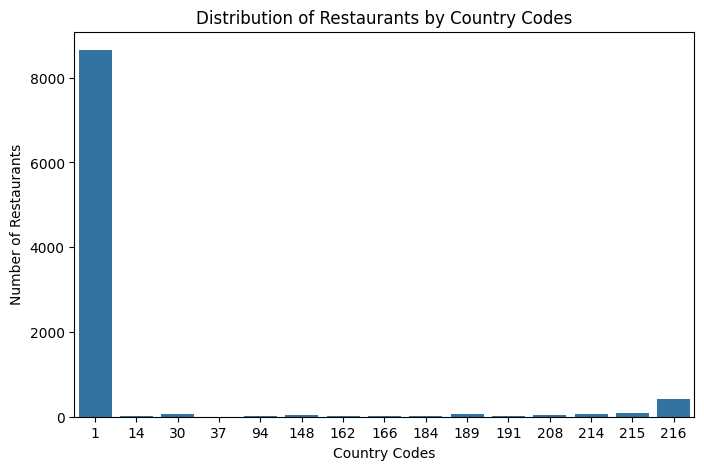

In [23]:

# Distribution of categorical variables for Country Code
# Count Plot Visualization Code for Country Codes
# Set the plot size
plt.figure(figsize=(8, 5))

# Creating the figure object
sns.countplot(x = df['Country Code'])
# Set Labels
plt.xlabel('Country Codes')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Country Codes')

# Displaying Chart
plt.show()


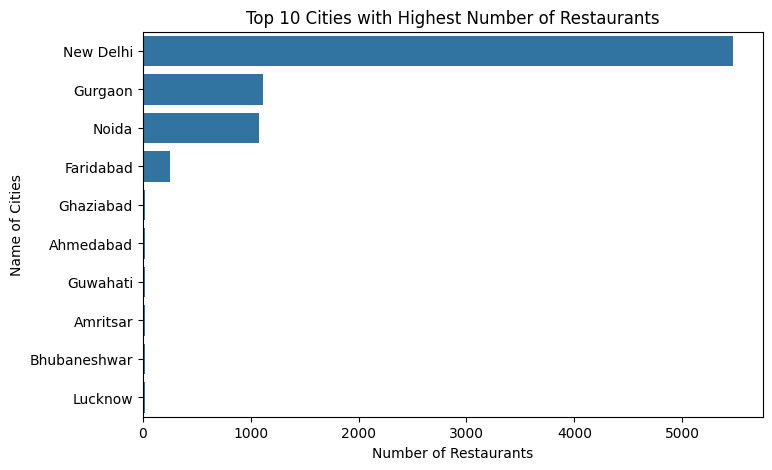

In [24]:

# Count Plot Visualization Code for Cities
# Set the plot size
plt.figure(figsize=(8, 5))

# Creating the figure object
# There are many cities names that are present in the data, so selecting only the top 10 cities
sns.countplot(y = df['City'], order=df.City.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Top 10 Cities with Highest Number of Restaurants')

# Displaying Chart
plt.show()

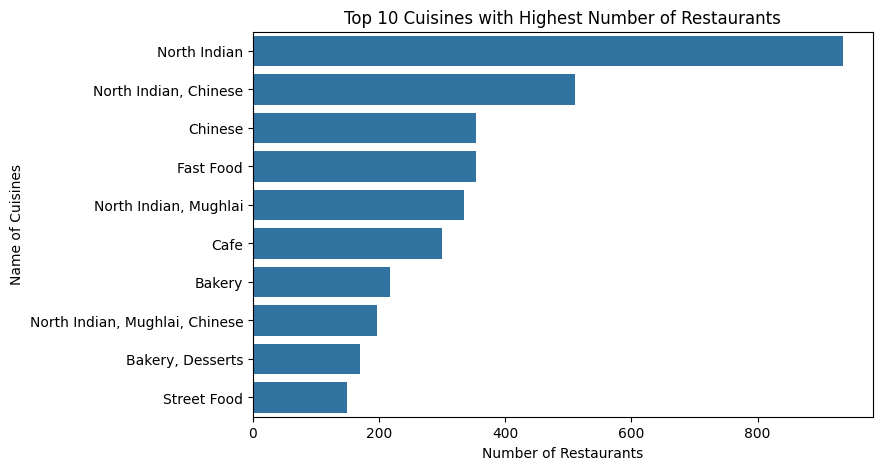

In [25]:

# Counting Plot Visualization Code for Cuisines
# Set the plot size
plt.figure(figsize=(8, 5))

# Creating the figure object
# There are many cuisine names thatare present in the data, so selecting only the top 10 cuisines
sns.countplot(y = df['Cuisines'], order=df.Cuisines.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cuisines')
plt.title('Top 10 Cuisines with Highest Number of Restaurants')

# Displaying Chart
plt.show()


#Top cuisines and cities with the highest number of restaurants.

In [27]:

# Top cuisines and cities with the highest number of restaurants

# Identify the top 10 cuisines
top_cuisines = df['Cuisines'].value_counts().head(10)

# Display the results
print("Top 10 Cuisines with Highest Number of Restaurants:")
print(top_cuisines)

Top 10 Cuisines with Highest Number of Restaurants:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [28]:
# Identifying the top 10 cities
top_cities = df['City'].value_counts().head(10)

# Displaying the results
print("Top 10 Cities with Highest Number of Restaurants:")
print(top_cities)


Top 10 Cities with Highest Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64


#Task 3:


#Visualizing Locations of Restaurants

<ipython-input-29-6e6678757cff>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


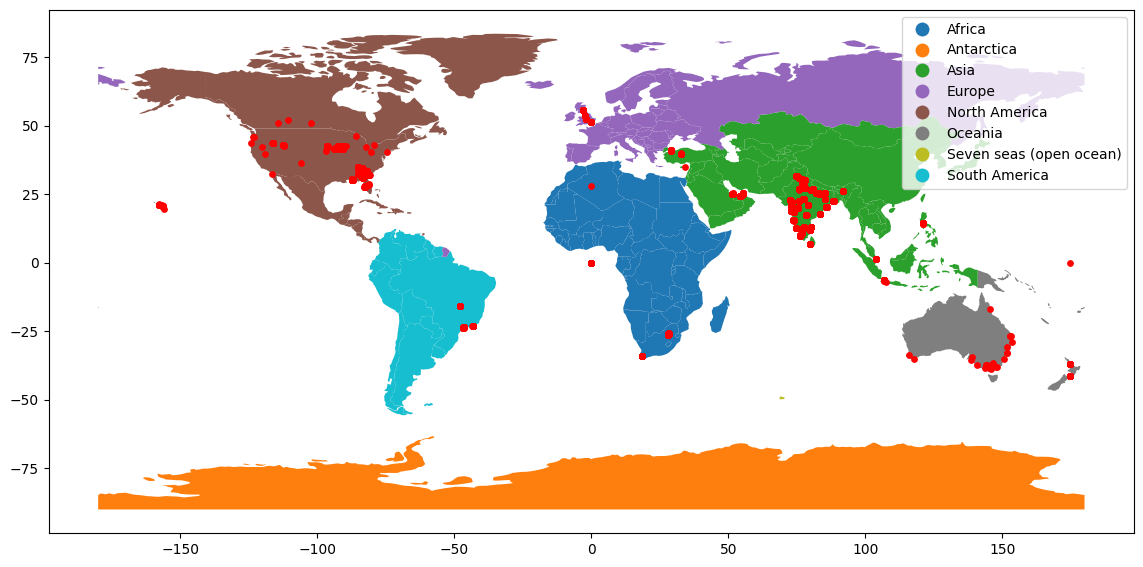

In [29]:
# Importing the necessary libraries for locations of restaurants on a map using latitude and longitude information
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Creating Point geometry from latitude and longitude using Shapely
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude)
)

# Creating a base map of the world using Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Creating a map that fits the screen and plots the restaurant locations
# The "continent" column is used for coloring and a legend is displayed
gdf.plot(ax=world.plot("continent", legend = True, figsize=(14, 12)), marker='o', color='red', markersize=15)

# Show the map
plt.show()


#Distribution of Restaurants by City

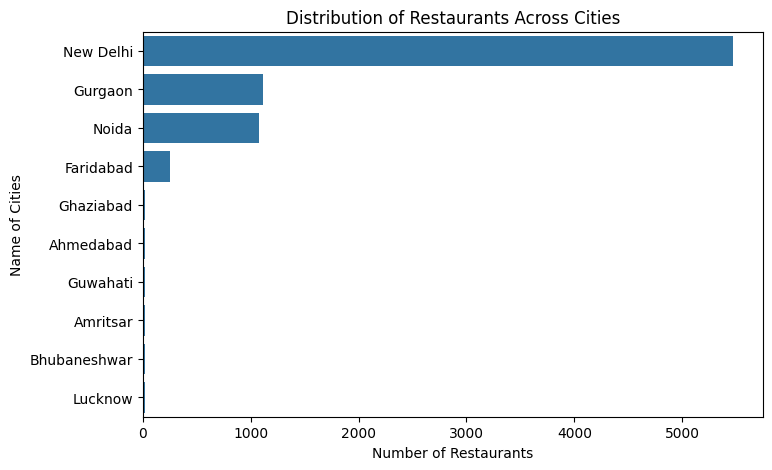

In [30]:

# Distribution of restaurants across different cities
# Setthe  plot size
plt.figure(figsize=(8, 5))

# Creating the figure object
# There are many cities names present in the data, so i select only the top 10 cities
sns.countplot(y = df['City'], order=df.City.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Distribution of Restaurants Across Cities')

# Displaying Chart
plt.show()


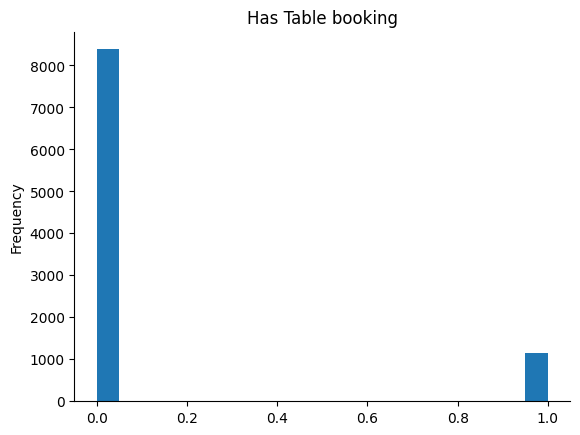

In [31]:
# @title Has Table booking

from matplotlib import pyplot as plt
df['Has Table booking'].plot(kind='hist', bins=20, title='Has Table booking')
plt.gca().spines[['top', 'right',]].set_visible(False)

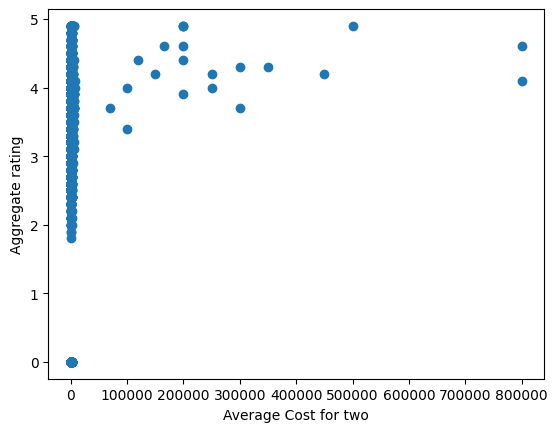

In [32]:
# @title Average Cost vs Rating

import matplotlib.pyplot as plt
plt.scatter(df['Average Cost for two'], df['Aggregate rating'])
plt.xlabel('Average Cost for two')
_ = plt.ylabel('Aggregate rating')

<Axes: xlabel='Aggregate rating', ylabel='Average Cost for two'>

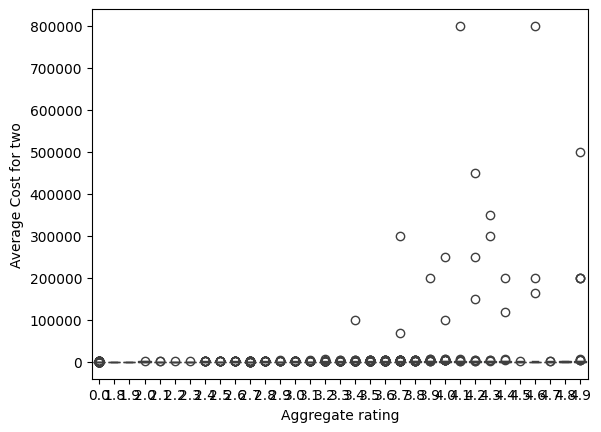

In [34]:
# @title Average Cost for two vs Aggregate Rating plot outliers
sns.boxplot(x="Aggregate rating", y="Average Cost for two", data=df)

In [35]:
df.shape

(9542, 21)

In [36]:
# drop features that inhibit model building
df = df.drop('Restaurant ID', axis=1)
df = df.drop('Restaurant Name', axis=1)
df = df.drop('Country Code', axis=1)
df= df.drop('City', axis=1)
df = df.drop('Address', axis=1)
df= df.drop('Locality', axis=1)
df= df.drop('Locality Verbose', axis=1)
df= df.drop('Longitude', axis=1)
df = df.drop('Latitude', axis=1)
df= df.drop('Cuisines', axis=1)
df= df.drop('Currency', axis=1)

<Axes: ylabel='count'>

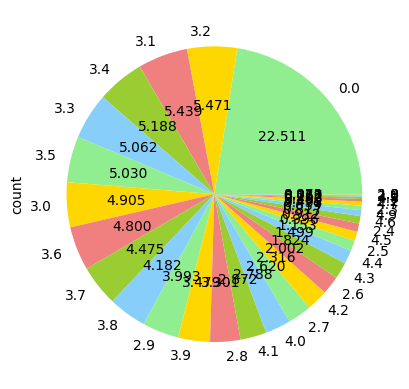

In [40]:
df['Aggregate rating'].value_counts().plot(kind='pie', autopct = '%.3f', colors=['lightgreen', 'gold', 'lightcoral', 'yellowgreen', 'lightskyblue'])


<ipython-input-48-00528cf33232>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Aggregate rating'])


<Axes: xlabel='Aggregate rating', ylabel='Density'>

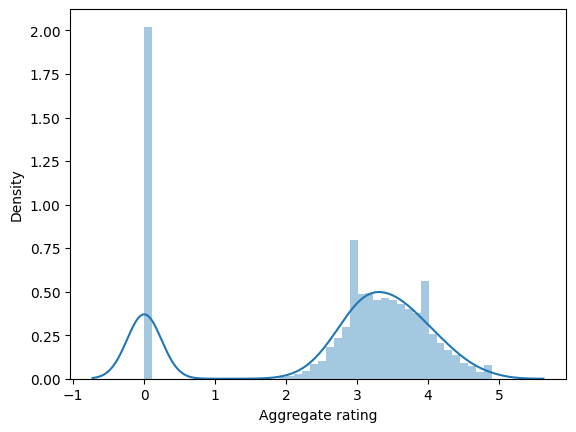

In [48]:
sns.distplot(df['Aggregate rating'])

<Axes: xlabel='Rating text', ylabel='Votes'>

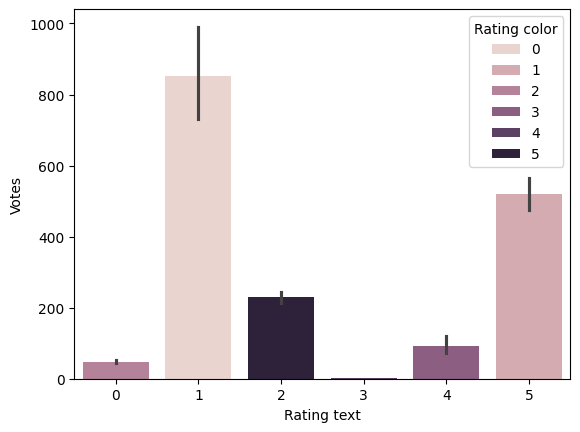

In [49]:
sns.barplot(x=df["Rating text"],y=df["Votes"],hue =df["Rating color"])

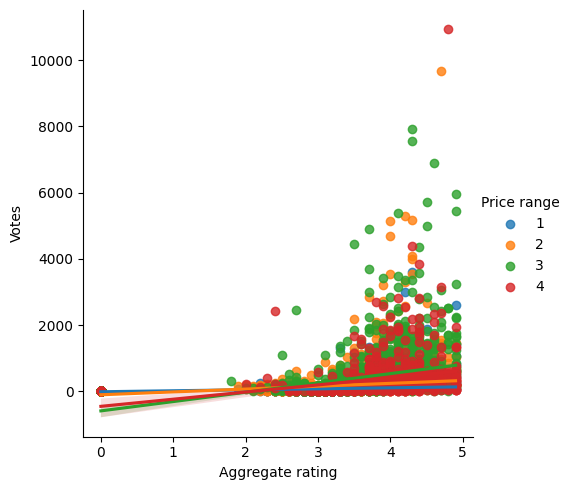

In [50]:
sns.lmplot(x="Aggregate rating", y="Votes", hue="Price range", data=df)


#Correlation Between the Restaurant's Location and its Rating





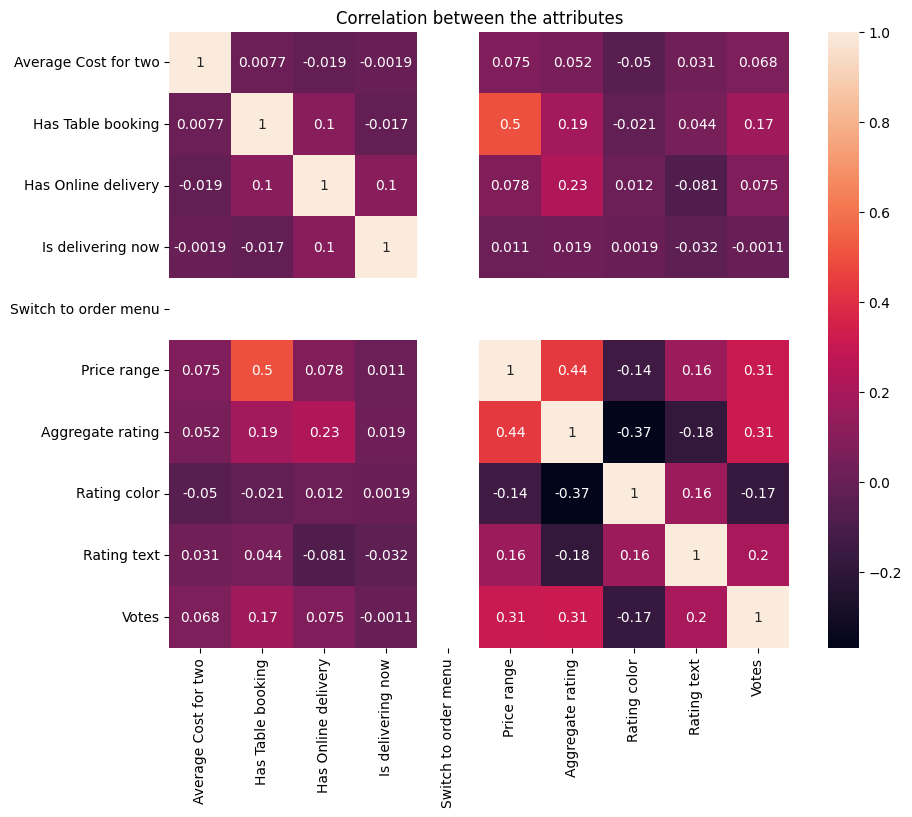

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between the attributes")
plt.show()

# **Conclusion**
The insights which i found from the overall level 1 project:

**Data Exploration and Preprocessing**

-    
Encompassing details from various cities, the dataset features 9,551 data points across 21 columns.
-    
Notably, missing values are minimal (only 9) and restricted to the "Cuisines" column.So we drop the values from  Cuisines column.
-
The data boasts requires  data type conversions. The distribution of "Aggregate rating" exhibits a  class imbalance.


**Descriptive Analysis**

-   Analysis of numerical columns revealed key statistical characteristics.
-   Country codes 1 and 216 emerged as having the highest number of restaurants.
- New Delhi, Gurgaon, and Noida topped the charts for city-wise restaurant count.
-  North Indian and Chinese Cuisines reigned supreme in terms of popularity.


**Geospatial Analysis**


-   Geographic Distribution: North America and Asia (particularly India) boast the highest restaurant concentrations.
- City-Level Distribution: New Delhi reigns supreme in restaurant count, followed by Gurgaon, Noida, and Faridabad.
-  Correlation: Interestingly, no correlation exists between latitude and rating. However, a negative correlation between longitude and rating suggests potential trends based on east-west location (further west might have higher ratings based on specific data).









# **Analysing the factors affecting Restaurant Ratings**
1.Distribution of the target variable ("Aggregate rating") is not balanced.

2.Expensive restaurants which have higher price range are  most likely to have higher ratings.